# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Dyna Akmila
- **Email:** Dynaakmila17@gmail.com
- **ID Dicoding:** Dynakmila17

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Produk dalam kategori apa yang paling banyak dibeli?
- Pertanyaan 2 : Bagaimana jumlah tren penjualan setiap bulannya?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

100%|██████████| 42.6M/42.6M [00:00<00:00, 134MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2


In [ ]:
df_products = pd.read_csv('/content/sample_data/olist_products_dataset.csv')
df_order_item = pd.read_csv('/content/sample_data/olist_order_items_dataset.csv')
df_orders = pd.read_csv('/content/sample_data/olist_orders_dataset.csv')

### Assessing Data

In [ ]:
print("banyak data produk:",len(df_products.index))
display(df_products.head())

banyak data produk: 32951


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
print("Banyak produk id duplicate: ",df_products['product_id'].duplicated().sum())

Banyak produk id duplicate:  0


In [ ]:
df_products.isna().sum()

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [ ]:
df_products.dtypes

,0
product_id,object
product_category_name,object
product_name_lenght,float64
product_description_lenght,float64
product_photos_qty,float64
product_weight_g,float64
product_length_cm,float64
product_height_cm,float64
product_width_cm,float64


In [ ]:
print("banyak data penggabung:",len(df_order_item.index))
display(df_order_item.head())

banyak data penggabung: 76182


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
df_order_item.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,1
shipping_limit_date,1
price,1
freight_value,1


In [ ]:
df_order_item.dtypes

,0
order_id,object
order_item_id,int64
product_id,object
seller_id,object
shipping_limit_date,object
price,float64
freight_value,float64


In [ ]:
print("banyak data order:",len(df_orders.index))
display(df_orders.head())

banyak data order: 59058


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
print("Banyak order id duplicate: ",df_orders['order_id'].duplicated().sum())

Banyak order id duplicate:  0


In [ ]:
df_orders.isna().sum()

,0
order_id,0
customer_id,1
order_status,1
order_purchase_timestamp,1
order_approved_at,102
order_delivered_carrier_date,1048
order_delivered_customer_date,1754
order_estimated_delivery_date,1


In [ ]:
df_orders.dtypes

,0
order_id,object
customer_id,object
order_status,object
order_purchase_timestamp,object
order_approved_at,object
order_delivered_carrier_date,object
order_delivered_customer_date,object
order_estimated_delivery_date,object


### Cleaning Data

In [ ]:
df_products.dropna(axis=0, inplace=True, subset=['product_category_name'])

In [ ]:
df_orders.dropna(axis=0, inplace=True)

In [ ]:
df_order_item['shipping_limit_date'] = pd.to_datetime(df_order_item['shipping_limit_date'], format='mixed')

In [ ]:
columns = ["order_purchase_timestamp","order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in columns:
    df_orders[column] = pd.to_datetime(df_orders[column])

In [ ]:
df_products_order_item = pd.merge(
    left=df_products,
    right=df_order_item,
    how="inner",
    left_on="product_id",
    right_on="product_id"
)

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
top_product_category = df_products_order_item.groupby(by="product_category_name").order_id.nunique().sort_values(ascending=False).head(5)
top_product_category

,order_id
product_category_name,
cama_mesa_banho,6374
beleza_saude,5846
esporte_lazer,5082
informatica_acessorios,4532
moveis_decoracao,4367


In [ ]:
df_orders.dtypes

,0
order_id,object
customer_id,object
order_status,object
order_purchase_timestamp,datetime64[ns]
order_approved_at,datetime64[ns]
order_delivered_carrier_date,datetime64[ns]
order_delivered_customer_date,datetime64[ns]
order_estimated_delivery_date,datetime64[ns]


In [ ]:
group_param = df_orders['order_purchase_timestamp'].dt.to_period("M")
monthly_order = df_orders.groupby(group_param).order_id.nunique()
monthly_order

,order_id
order_purchase_timestamp,
2016-09,1
2016-10,152
2016-12,1
2017-01,429
2017-02,956
2017-03,1532
2017-04,1352
2017-05,2104
2017-06,1858


## Visualization & Explanatory Analysis

### Pertanyaan 1:

<Axes: xlabel='product_category_name'>

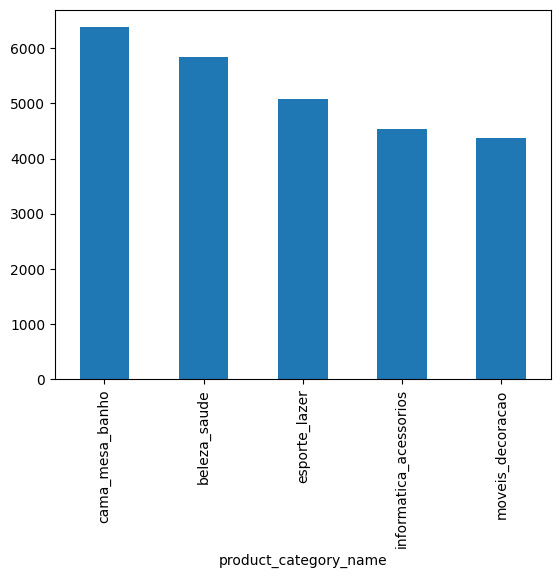

In [ ]:
top_product_category.plot.bar()

### Pertanyaan 2:

<Axes: xlabel='order_purchase_timestamp'>

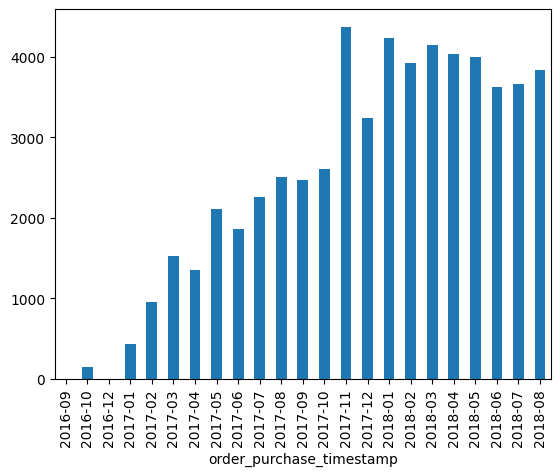

In [ ]:
monthly_order.plot.bar()

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1 : Kategori produk "cama_mesa_banho" mendominasi penjualan dengan 6.374 unit, diikuti oleh "beleza_saude" (5.846 unit), "esporte_lazer" (5.082 unit), "informatica_acessorios" (4.532 unit), dan "moveis_decoracao" (4.367 unit). Hal ini menunjukkan preferensi konsumen yang kuat terhadap produk-produk rumah tangga dan perawatan diri. Untuk mengoptimalkan penjualan, fokuskan pada pemasaran dan pengelolaan stok untuk kategori terlaris, terutama "cama_mesa_banho" dan "beleza_saude".

- Conclution pertanyaan 2 : Tren penjualan bulanan menunjukkan peningkatan linear secara umum, dengan penjualan terendah terjadi pada September dan Desember 2016 (hanya 1 unit) dan penjualan tertinggi pada November 2017 (4.373 unit). Pertimbangkan untuk menerapkan strategi promosi khusus pada bulan-bulan dengan penjualan rendah dan meningkatkan intensitas pemasaran menjelang periode penjualan tinggi seperti November.

In [ ]:
all_df = pd.concat([df_products, df_order_item, df_orders], axis=1)
all_df.to_csv("all_data.csv", index=False)